# Spam Email Classification

In [1]:
# Importing an ipynb file from another ipynb file
!pip install ipynb

# Importing functions from another jupyter notebook
!pip install nbimporter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import nbimporter
import spambase_dataset_loader_nb
import spambase_model_helper_nb

## Data Preparation:

### Load the datasets:

In [3]:
loader = spambase_dataset_loader_nb.SpambaseDatasetLoader()

init Loader notebook


In [4]:
help(loader.load_dataset)

Help on method load_dataset in module spambase_dataset_loader_nb:

load_dataset(url='https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data') method of spambase_dataset_loader_nb.SpambaseDatasetLoader instance
    (string) --> None
    
    This function retrieves the spambase.data from University of California Irvine (UCI) - Dataset Repository
    and save into two files:
    
    1. spambase_all.csv - The CSV file that contain all the rows from spambase.data.
    2. spambase_balance.csv - The CSV file that rows balance between spam and not spam records.



In [5]:
loader.load_dataset()

Loading dataset.
Loading spambase_all.csv completed.
Loading spambase_balance.csv completed.


In [6]:
spambase_all = loader.get_full_dataset()

get_full_dataset


### Data Exploration

#### Explore the data using info() and describe() and head()

In [7]:
spambase_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   target_spam_nonspam         4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4601 non-null   float64
 4   word_freq_3d                4601 non-null   float64
 5   word_freq_our               4601 non-null   float64
 6   word_freq_over              4601 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4601 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [8]:
spambase_all.describe()

,target_spam_nonspam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.394045,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.488698,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,1.000000,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,1.000000,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [9]:
spambase_all.head(5)

,target_spam_nonspam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


#### Check for null values.

<AxesSubplot:>

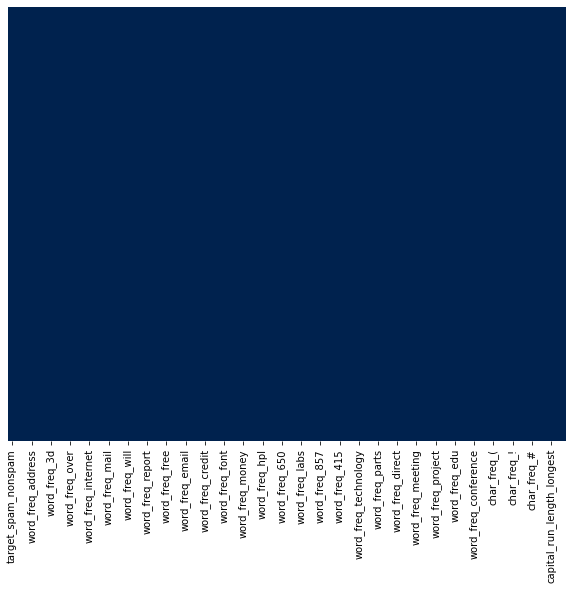

In [10]:
plt.figure(figsize=(10, 8))

ax = plt.axes()
sns.heatmap(spambase_all.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="cividis")


#### Check for na

In [11]:
spambase_all.isna().any()

target_spam_nonspam           False
word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george            

#### Check for data imbalance

[Text(0.5, 0, 'Spam or not')]

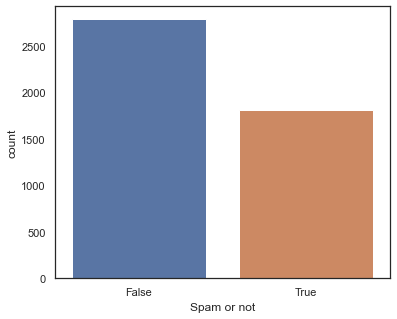

In [12]:
sns.set(rc={"figure.figsize":(6, 5)})
sns.set_style('white')

spambase_all_exp = spambase_all.copy()
spambase_all_exp["target_spam_nonspam"] = spambase_all_exp["target_spam_nonspam"].astype(bool)

ax = sns.countplot(x='target_spam_nonspam', data=spambase_all_exp) 
ax.set(xlabel='Spam or not')

#### Explore for Correlations
The large number of features makes it difficult to determine the correlations.

<AxesSubplot:>

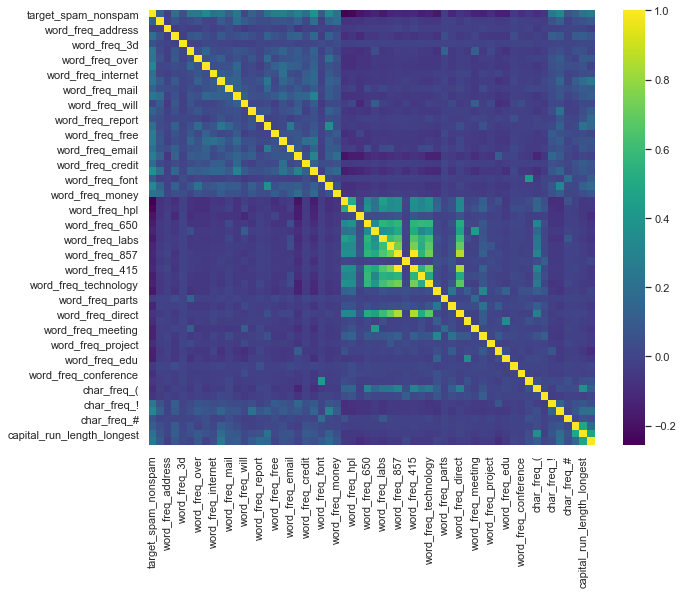

In [13]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(spambase_all_exp.corr(), cmap='viridis')

### Challenges
* Imbalance Binary Classification
* Large number of features

### Solutions

#### Pandas Undersampling for Imbalanced Binary Classification

In [14]:
spam = spambase_all[spambase_all['target_spam_nonspam']==1]
non_spam = spambase_all[spambase_all['target_spam_nonspam']==0]
non_spam = non_spam.sample(n=len(spam), random_state=101)
spambase_balance = pd.concat([spam, non_spam],axis=0)  

# an alternative is simply use the loader.get_balance_dataset()
# since SpambaseDatasetLoader already handled the undersampling during load.

spambase_balance = loader.get_balance_dataset()

get_balance_data


[Text(0.5, 0, 'Spam or not')]

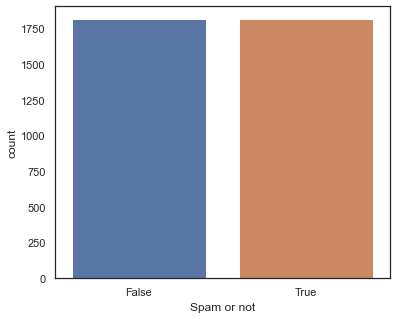

In [15]:
spambase_balance_exp = spambase_balance.copy()
spambase_balance_exp["target_spam_nonspam"] = spambase_balance_exp["target_spam_nonspam"].astype(bool)

sns.set(rc={"figure.figsize":(6, 5)})
sns.set_style('white')
ax = sns.countplot(x='target_spam_nonspam', data=spambase_balance_exp) 
ax.set(xlabel='Spam or not')

#### Feature Selection

In [16]:
help(loader.perform_feature_selection)

Help on method perform_feature_selection in module spambase_dataset_loader_nb:

perform_feature_selection(data, feature_selection_type) method of spambase_dataset_loader_nb.SpambaseDatasetLoader instance
    (DataFrame, float) --> Dataframe
    
    
    This function performs feature selection based on provided feature selection type.        
            
    Parameters
    ----------
    data: Dataframe that will be use in feature selection.
    
    threshold: If the p-value is higher than the threshold, we discard the combinations of features.
    
    Returns
    ----------        
    DataFrame : The DataFrame after performing feature selection.



In [17]:
stepwise_result = loader.perform_feature_selection(data=spambase_balance, feature_selection_type='stepwise_back')

The shape before feature selection: (3626, 58)
Feature Selection using Backward Elimination
Optimization terminated successfully.
         Current function value: 0.198765
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.200934
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200936
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200939
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200946
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200953
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200964
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200981
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.201007
    

In [18]:
pearson_result = loader.perform_feature_selection(data=spambase_balance, feature_selection_type='pearson')

The shape before feature selection: (3626, 58)
Feature Selection using Person Correlation
The shape after feature selection: (3626, 19)


In [19]:
chi2_result = loader.perform_feature_selection(data=spambase_balance, feature_selection_type='chi2')

The shape before feature selection: (3626, 58)
Feature Selection using Chi-squared
The shape after feature selection: (3626, 19)


In [20]:
print(stepwise_result[0].columns)

Index(['word_freq_make', 'word_freq_address', 'word_freq_our',
       'word_freq_over', 'word_freq_remove', 'word_freq_internet',
       'word_freq_order', 'word_freq_will', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_credit',
       'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_data',
       'word_freq_85', 'word_freq_technology', 'word_freq_pm',
       'word_freq_meeting', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_conference', 'char_freq_;', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')


In [21]:
print(pearson_result[0].columns)

Index(['word_freq_all', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_order', 'word_freq_receive', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'char_freq_!', 'char_freq_$',
       'capital_run_length_total'],
      dtype='object')


In [22]:
print(chi2_result[0].columns)

Index(['word_freq_our', 'word_freq_remove', 'word_freq_free',
       'word_freq_business', 'word_freq_you', 'word_freq_credit',
       'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'word_freq_lab',
       'word_freq_meeting', 'word_freq_edu', 'char_freq_!',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')


## Model

### Statsmodels
The study introduced a model helper for running the test.

In [23]:
model_helper = spambase_model_helper_nb.SpambaseModelHelper()

init Model Helper notebook


In [24]:
help(model_helper.run_statsmodels_logit)

Help on method run_statsmodels_logit in module spambase_model_helper_nb:

run_statsmodels_logit(data, feature_selection_type=None, verbose=False) method of spambase_model_helper_nb.SpambaseModelHelper instance
    This function run logistic regression based from stats models.
    
    (DataFrame, boolean, boolean) --> DataFrame
    
    Parameters
    ----------
    data: Dataframe that will be use in running the model.
    
    feature_selection_type: Type of Feature Selection to use. Available options are stepwise_back, pearson and chi2.
    verbose: True to display statsmodels summary, confusion matrix and its heatmap otherwise false.
    
    Returns
    ----------        
    DataFrame : The DataFrame of statsmodels scores.



#### Balance Dataset and Backward Elimination Technique

get_balance_data
init Loader notebook
The shape before feature selection: (3626, 58)
Feature Selection using Backward Elimination
Optimization terminated successfully.
         Current function value: 0.198765
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.200934
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200936
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200939
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200946
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200953
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200964
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.200981
         Iterations 16
Optimization terminated successfully.
        

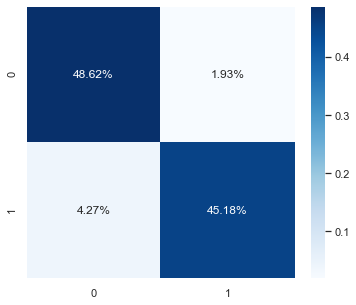

In [25]:
spambase_balance = loader.get_balance_dataset()

df_sm_stepwise_back = model_helper.run_statsmodels_logit(spambase_balance, 
                    feature_selection_type='stepwise_back', verbose=True)

In [26]:
df_sm_stepwise_back

,Accuracy,Precision,Recall,F1-Score
Score,0.938017,0.961853,0.919271,0.94008


#### Balance Dataset and Pearson Correlation

get_balance_data
init Loader notebook
The shape before feature selection: (3626, 58)
Feature Selection using Person Correlation
The shape after feature selection: (3626, 19)
Optimization terminated successfully.
         Current function value: 0.270555
         Iterations 14
                            Logit Regression Results                           
Dep. Variable:     target_spam_nonspam   No. Observations:                 2900
Model:                           Logit   Df Residuals:                     2880
Method:                            MLE   Df Model:                           19
Date:                 Fri, 28 Jul 2023   Pseudo R-squ.:                  0.6097
Time:                         14:59:27   Log-Likelihood:                -784.61
converged:                        True   LL-Null:                       -2010.1
Covariance Type:             nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025   

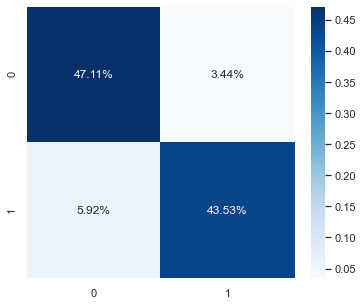

In [27]:
spambase_balance = loader.get_balance_dataset()

df_sm_pearson = model_helper.run_statsmodels_logit(spambase_balance, 
                    feature_selection_type='pearson', verbose=True)

In [28]:
df_sm_pearson

,Accuracy,Precision,Recall,F1-Score
Score,0.906336,0.93188,0.888312,0.909574


#### Balance Dataset and Chi-squared

get_balance_data
init Loader notebook
The shape before feature selection: (3626, 58)
Feature Selection using Chi-squared
The shape after feature selection: (3626, 19)
Optimization terminated successfully.
         Current function value: 0.254574
         Iterations 14
                            Logit Regression Results                           
Dep. Variable:     target_spam_nonspam   No. Observations:                 2900
Model:                           Logit   Df Residuals:                     2880
Method:                            MLE   Df Model:                           19
Date:                 Fri, 28 Jul 2023   Pseudo R-squ.:                  0.6327
Time:                         14:59:28   Log-Likelihood:                -738.27
converged:                        True   LL-Null:                       -2010.1
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.

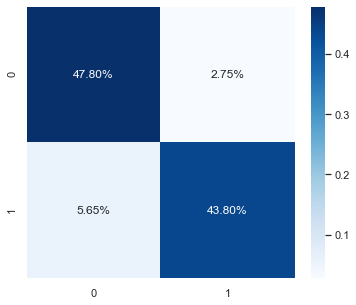

In [29]:
spambase_balance = loader.get_balance_dataset()

df_sm_chi2 = model_helper.run_statsmodels_logit(spambase_balance, 
                    feature_selection_type='chi2', verbose=True)

In [30]:
df_sm_chi2

,Accuracy,Precision,Recall,F1-Score
Score,0.915978,0.945504,0.89433,0.919205


#### Balance Dataset without Feature Selection

get_balance_data
Optimization terminated successfully.
         Current function value: 0.200946
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2842
Method:                           MLE   Df Model:                           57
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.7101
Time:                        14:59:28   Log-Likelihood:                -582.74
converged:                       True   LL-Null:                       -2010.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2212      0.177     -6.912      0.000      -1.567      -0.875
x1         

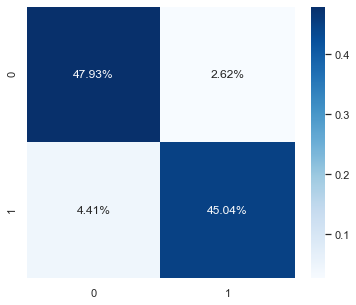

In [31]:
spambase_balance = loader.get_balance_dataset()

df_sm_none = model_helper.run_statsmodels_logit(spambase_balance, 
                    feature_selection_type=None, verbose=True)

In [32]:
df_sm_none

,Accuracy,Precision,Recall,F1-Score
Score,0.929752,0.948229,0.915789,0.931727


#### Full Dataset and Backward Elimination Technique

In [33]:
spambase_full = loader.get_full_dataset()

df_sm_full_stepwise = model_helper.run_statsmodels_logit(spambase_full, 
                    feature_selection_type='stepwise_back', verbose=False)
df_sm_full_stepwise

get_full_dataset
init Loader notebook
The shape before feature selection: (4601, 58)
Feature Selection using Backward Elimination
Optimization terminated successfully.
         Current function value: 0.197323
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.199514
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199528
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199542
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199576
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199597
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199624
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.199674
         Iterations 16
Optimization terminated successfully.
        

,Accuracy,Precision,Recall,F1-Score
Score,0.932682,0.955437,0.935428,0.945326


#### Full Dataset and Pearson Correlation

In [34]:
spambase_full = loader.get_full_dataset()

df_sm_full_pearson = model_helper.run_statsmodels_logit(spambase_full, 
                    feature_selection_type='pearson', verbose=False)
df_sm_full_pearson

get_full_dataset
init Loader notebook
The shape before feature selection: (4601, 58)
Feature Selection using Person Correlation
The shape after feature selection: (4601, 19)
Optimization terminated successfully.
         Current function value: 0.279534
         Iterations 10


,Accuracy,Precision,Recall,F1-Score
Score,0.892508,0.948307,0.883721,0.914875


#### Full Dataset and Chi-squared

In [35]:
spambase_full = loader.get_full_dataset()

df_sm_full_chi2 = model_helper.run_statsmodels_logit(spambase_full, 
                    feature_selection_type='chi2', verbose=False)
df_sm_full_chi2

get_full_dataset
init Loader notebook
The shape before feature selection: (4601, 58)
Feature Selection using Chi-squared
The shape after feature selection: (4601, 19)
Optimization terminated successfully.
         Current function value: 0.237301
         Iterations 15


,Accuracy,Precision,Recall,F1-Score
Score,0.919653,0.948307,0.92201,0.934974


#### Full Dataset without Feature Selection

In [36]:
spambase_full = loader.get_full_dataset()

df_sm_full_none = model_helper.run_statsmodels_logit(spambase_full, 
                    feature_selection_type=None, verbose=False)
df_sm_full_none

get_full_dataset
         Current function value: 0.191737
         Iterations: 35


D:\x-20a\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Accuracy,Precision,Recall,F1-Score
Score,0.926167,0.942959,0.936283,0.939609


### Result

In [37]:
df_bal_sm_merged = pd.concat([df_sm_stepwise_back, df_sm_pearson, df_sm_chi2, df_sm_none])

as_bal_list = df_bal_sm_merged.index.tolist()

as_bal_list[0] = 'Balance dataset and Backward Elimination'
as_bal_list[1] = 'Balance dataset and Pearson Correlation'
as_bal_list[2] = 'Balance dataset and Chi-squared'
as_bal_list[3] = 'Balance dataset without Feature Selection'
df_bal_sm_merged.index = as_bal_list

In [38]:
df_full_sm_merged = pd.concat([df_sm_full_stepwise, df_sm_full_pearson, df_sm_full_chi2, df_sm_full_none])

as_full_list = df_full_sm_merged.index.tolist()

as_full_list[0] = 'Full dataset and Backward Elimination'
as_full_list[1] = 'Full dataset and Pearson Correlation'
as_full_list[2] = 'Full dataset and Chi-squared'
as_full_list[3] = 'Full dataset without Feature Selection'
df_full_sm_merged.index = as_full_list

#### Balance Dataset

In [39]:
df_bal_sm_merged = df_bal_sm_merged.sort_values('F1-Score', ascending=False)
df_bal_sm_merged

,Accuracy,Precision,Recall,F1-Score
Balance dataset and Backward Elimination,0.938017,0.961853,0.919271,0.940080
Balance dataset without Feature Selection,0.929752,0.948229,0.915789,0.931727
Balance dataset and Chi-squared,0.915978,0.945504,0.894330,0.919205
Balance dataset and Pearson Correlation,0.906336,0.931880,0.888312,0.909574


#### Full Dataset

In [40]:
df_full_sm_merged = df_full_sm_merged.sort_values('F1-Score', ascending=False)
df_full_sm_merged

,Accuracy,Precision,Recall,F1-Score
Full dataset and Backward Elimination,0.932682,0.955437,0.935428,0.945326
Full dataset without Feature Selection,0.926167,0.942959,0.936283,0.939609
Full dataset and Chi-squared,0.919653,0.948307,0.922010,0.934974
Full dataset and Pearson Correlation,0.892508,0.948307,0.883721,0.914875


## Conclusion

The balance dataset without feature selection produce better result compared to other models.